In [1]:
import pandas as pd

df = pd.read_csv("Spam Dataset.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df.shape

(5572, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.duplicated().sum()

415

In [5]:
data = df.drop_duplicates()
data.shape

(5157, 2)

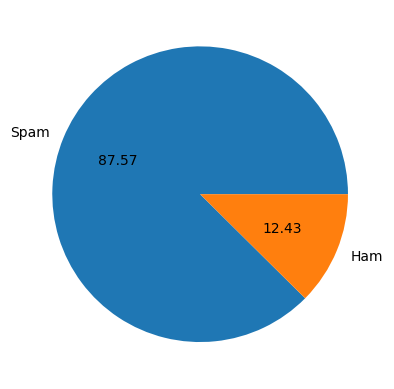

In [6]:
import matplotlib.pyplot as plt

plt.pie(data["Category"].value_counts(), labels=["Spam", "Ham"], autopct="%0.2f")
plt.show()

In [7]:
data["Category"].value_counts()

Category
ham     4516
spam     641
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data.loc[:, "Category"] = le.fit_transform(data["Category"])
data.head()

# 0 --> Ham
# 1 --> Spam

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Running')

'run'

In [12]:
df['Message'][100]

"Please don't text me anymore. I have nothing else to say."

In [13]:
def transform_text(Message):
    #tokenizing and converting texts in lower case
    Message = Message.lower()
    Message = nltk.word_tokenize(Message)
   
    #removing alphanumeric values
    y = []
    for i in Message:
        if i.isalnum():
            y.append(i)
    
    #removing stopwords and puctuations
    Message = y[:]
    y.clear()
    
    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    #stemming
    Message = y[:]
    y.clear()
    for i in Message:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [14]:
transform_text("Please don't text me anymore. I have nothing else to say.")

'pleas text anymor noth els say'

In [15]:
data.loc[:, 'Transformed_text'] = data["Message"].apply(transform_text).copy()
data.head()

C:\Users\santh\AppData\Local\Temp\ipykernel_7724\199618436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Transformed_text'] = data["Message"].apply(transform_text).copy()


,Category,Message,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [16]:
Data = data.drop(["Message"], axis=1)
Data.head()

,Category,Transformed_text
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though


In [17]:
X = Data["Transformed_text"]
Y = Data["Category"]

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
Y_train = y_train.astype('int64')
Y_train.dtype

dtype('int64')

In [20]:
print(x_train.shape)
print(Y_train.shape)

(4125,)
(4125,)


In [21]:
print(Y_train.dtype)

int64


In [22]:
y_train_encoded = le.fit_transform(y_train)
print(y_train_encoded.dtype)

int32


In [23]:
print(x_train.shape)
print(y_train_encoded.shape)

(4125,)
(4125,)


In [24]:
x_test.shape

(1032,)

In [25]:
Y_test = y_test.astype('int64')
Y_test.dtype

dtype('int64')

In [26]:
y_test.shape

(1032,)

In [27]:
print(Y_test.dtype)

int64


In [28]:
y_test_encoded = le.fit_transform(y_train)
print(y_test_encoded.dtype)

int32


In [29]:
y_train_encoded = y_train_encoded.astype('int64')
y_test_encoded = y_test_encoded.astype('int64')
print(y_train_encoded.dtype)
print(y_test_encoded.dtype)

int64
int64


In [30]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [31]:
Token = Tokenizer(num_words = 1000)
Token.fit_on_texts(x_train)
Token.word_index

{'u': 1,
 'call': 2,
 '2': 3,
 'go': 4,
 'get': 5,
 'ur': 6,
 'come': 7,
 '4': 8,
 'like': 9,
 'know': 10,
 'gt': 11,
 'time': 12,
 'lt': 13,
 'want': 14,
 'got': 15,
 'ok': 16,
 'free': 17,
 'good': 18,
 'love': 19,
 'day': 20,
 'text': 21,
 'send': 22,
 'need': 23,
 'one': 24,
 'ü': 25,
 'today': 26,
 'see': 27,
 'stop': 28,
 'take': 29,
 'think': 30,
 'lor': 31,
 'home': 32,
 'back': 33,
 'tell': 34,
 'still': 35,
 'txt': 36,
 'repli': 37,
 'da': 38,
 'hi': 39,
 'make': 40,
 'dont': 41,
 'r': 42,
 'phone': 43,
 'ask': 44,
 'mobil': 45,
 'n': 46,
 'hope': 47,
 'new': 48,
 'miss': 49,
 'night': 50,
 'meet': 51,
 'week': 52,
 'sorri': 53,
 'wait': 54,
 'much': 55,
 'well': 56,
 'thing': 57,
 'k': 58,
 'tri': 59,
 'pleas': 60,
 'say': 61,
 'work': 62,
 'oh': 63,
 'hey': 64,
 'happi': 65,
 'thank': 66,
 'give': 67,
 'number': 68,
 'na': 69,
 'later': 70,
 'wat': 71,
 'messag': 72,
 'way': 73,
 'alreadi': 74,
 'great': 75,
 'im': 76,
 'claim': 77,
 'let': 78,
 'c': 79,
 'dear': 80,
 'babe

In [32]:
Token.document_count

4125

In [33]:
x_train_sequence = Token.texts_to_sequences(x_train)
x_train_sequence

[[23, 25, 310, 189],
 [80,
  10,
  13,
  11,
  619,
  13,
  11,
  619,
  311,
  19,
  153,
  67,
  679,
  282,
  20,
  9,
  680,
  60,
  120,
  343],
 [56, 4],
 [807, 53, 331, 739, 620, 254, 536, 5, 374, 808],
 [60, 41, 61, 9, 39, 39, 39],
 [80, 312, 916, 190, 8, 917, 240, 123, 130, 2, 255, 740, 502, 283],
 [165, 741],
 [96, 271, 681, 918, 113, 191],
 [63, 313, 91],
 [132],
 [34, 1, 3, 2, 77, 94, 1, 3, 478, 6, 45, 182, 343, 95],
 [173],
 [5, 73, 223],
 [1, 35, 131],
 [41, 254, 43, 809, 16],
 [394, 159, 69, 166, 70, 116],
 [537],
 [102, 31, 7],
 [148],
 [106, 621, 272, 66, 18, 121, 32, 247, 165, 581, 6, 20, 1, 102],
 [16, 375, 32, 168, 107, 18, 456, 12, 62],
 [682],
 [1, 622, 174, 170, 121, 3, 314, 1, 210, 742, 1, 919, 1],
 [17, 2],
 [117,
  273,
  77,
  6,
  683,
  743,
  256,
  26,
  21,
  175,
  744,
  203,
  45,
  248,
  744,
  810,
  457],
 [920, 503, 745, 332, 118, 34],
 [479, 37, 21, 376, 160, 921, 219, 249, 684, 154, 84, 37, 28, 149],
 [14, 4, 811, 480, 15, 80, 315, 61, 12],
 [6

In [34]:
x_test_sequence = Token.texts_to_sequences(x_test)
x_test_sequence

[[504, 2, 61, 141, 40, 119, 62, 796, 787, 460, 13, 11],
 [226],
 [213, 211, 91],
 [84, 59, 2, 37, 297, 17, 139, 45, 17, 565, 60, 2, 525, 401, 104],
 [101, 13, 11],
 [63, 29, 422],
 [703, 158, 538],
 [64, 1, 42, 197, 249, 1, 465, 18, 42, 48, 122, 79, 1, 326],
 [141, 24, 38, 60],
 [40,
  191,
  65,
  687,
  40,
  191,
  65,
  1,
  23,
  85,
  13,
  11,
  18,
  550,
  13,
  11,
  13,
  11,
  18,
  13,
  11,
  629,
  13,
  11,
  13,
  11,
  13,
  11,
  907,
  13,
  11,
  13,
  11,
  13,
  11,
  363,
  13,
  11,
  13,
  11,
  13,
  11,
  13,
  11,
  13,
  11,
  13,
  11,
  13,
  11,
  13,
  11],
 [58, 35, 19],
 [150, 75, 20, 157, 203, 170, 203, 4, 75, 543, 127, 652, 114, 600, 53],
 [134, 6, 130, 863, 447, 77, 36, 322, 508],
 [96, 4, 310, 43, 408, 47, 484, 388],
 [791, 169, 36],
 [10, 258, 343, 44, 468, 22, 468, 176],
 [96, 271, 35, 15, 524, 165],
 [239, 420, 383, 508, 852, 980, 726, 25, 15, 151, 852],
 [],
 [61, 13, 11, 100, 605, 409, 13, 11, 13, 12, 11, 442, 165, 21, 104],
 [319],
 [830, 5

In [35]:
X_train = pad_sequences(x_train_sequence, padding="post", maxlen=100)
X_test = pad_sequences(x_test_sequence, padding="post", maxlen=100)

In [36]:
from keras.layers import Dense, Flatten, LSTM, Embedding
from keras import Sequential

In [37]:
Model = Sequential()
Model.add(Embedding(1000, input_length = 100, output_dim = 32))
Model.add(LSTM(64, dropout=0.2, return_sequences=True))
Model.add(LSTM(32, dropout=0.2, return_sequences=False))
Model.add(Dense(1, activation="sigmoid"))

Model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           32000     
                                                                 
 lstm (LSTM)                 (None, 100, 64)           24832     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 69281 (270.63 KB)
Trainable params: 69281 (270.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
Model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

In [39]:
Model.fit(X_train, Y_train, batch_size=32,validation_data = (X_test, Y_test), epochs=10)

Epoch 1/10


129/129 [==============================] - 31s 150ms/step - loss: 0.3899 - acc: 0.8766 - val_loss: 0.3831 - val_acc: 0.8721
Epoch 2/10
129/129 [==============================] - 17s 128ms/step - loss: 0.3748 - acc: 0.8766 - val_loss: 0.3826 - val_acc: 0.8721
Epoch 3/10
129/129 [==============================] - 16s 123ms/step - loss: 0.3753 - acc: 0.8766 - val_loss: 0.3853 - val_acc: 0.8721
Epoch 4/10
129/129 [==============================] - 17s 133ms/step - loss: 0.3748 - acc: 0.8766 - val_loss: 0.3838 - val_acc: 0.8721
Epoch 5/10
129/129 [==============================] - 17s 134ms/step - loss: 0.3744 - acc: 0.8766 - val_loss: 0.3824 - val_acc: 0.8721
Epoch 6/10
129/129 [==============================] - 17s 130ms/step - loss: 0.3746 - acc: 0.8766 - val_loss: 0.3828 - val_acc: 0.8721
Epoch 7/10
129/129 [==============================] - 17s 133ms/step - loss: 0.3744 - acc: 0.8766 - val_loss: 0.3825 - val_acc: 0.8721
Epoch 8/10
129/129 [==============================] -

In [40]:
Model.evaluate(X_test, Y_test)
Model_metrics = Model.evaluate(X_test, Y_test)

print("loss:", Model_metrics[0])
print("accuracy:", Model_metrics[1])

33/33 [==============================] - 1s 41ms/step - loss: 0.3824 - acc: 0.8721
loss: 0.3824108839035034
accuracy: 0.8720930218696594


In [41]:
sent = ["offer at 80%"]  # Add your sentence to the list
test_seq = pad_sequences(Token.texts_to_sequences(sent), maxlen=100)
pred = Model.predict(test_seq) * 100

for i in range(len(sent)):
    if pred[i] > 50:
        print("Ham")
    else:
        print("Spam")

1/1 [==============================] - 2s 2s/step
Spam


In [42]:
tf.keras.models.save_model(Model, 'spam LSTM_mode.h5')

In [51]:
import pickle 

pickle.dump(Model, open("model.pkl", "wb"))
pickle.dump(Token, open("token.pkl", "wb"))

In [55]:
import os

directory = r"C:\Users\santh\OneDrive\Documents\Spam using LSTM model\Spam Model"
if not os.path.exists(directory):
    os.makedirs(directory)

